# Titanic Kaggle Challenge

The Titanic challenge hosted by Kaggle is a competition in which the goal is to predict the survival or the death of a given passenger based on a set of variables describing him such as his age, his sex, or his passenger class on the boat.

In particular, this notebook is taken from https://www.ahmedbesbes.com/blog/kaggle-titanic-competition as another version of Titanic Challenge, in order to study the difference and improve my result.

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

# EDA 
## Load Data and General Overview

In [3]:
data = pd.read_csv('data/train.csv')
print(data.shape)

(891, 12)


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The Survived column is the target variable. If Suvival = 1 the passenger survived, otherwise he's dead. The is the variable we're going to predict.

The other variables describe the passengers. They are the features.

* PassengerId: and id given to each traveler on the boat
* Pclass: the passenger class. It has three possible values: 1,2,3 (first, second and third class)
* The Name of the passeger
* The Sex
* The Age
* SibSp: number of siblings and spouses traveling with the passenger
* Parch: number of parents and children traveling with the passenger
* The ticket number
* The ticket Fare
* The cabin number
* The embarkation. This describe three possible areas of the Titanic from which the people embark. Three possible values S,C,Q

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Filling Age 
data['Age'] = data['Age'].fillna(data['Age'].median())

## Graph Analysis
### Targed by Sex

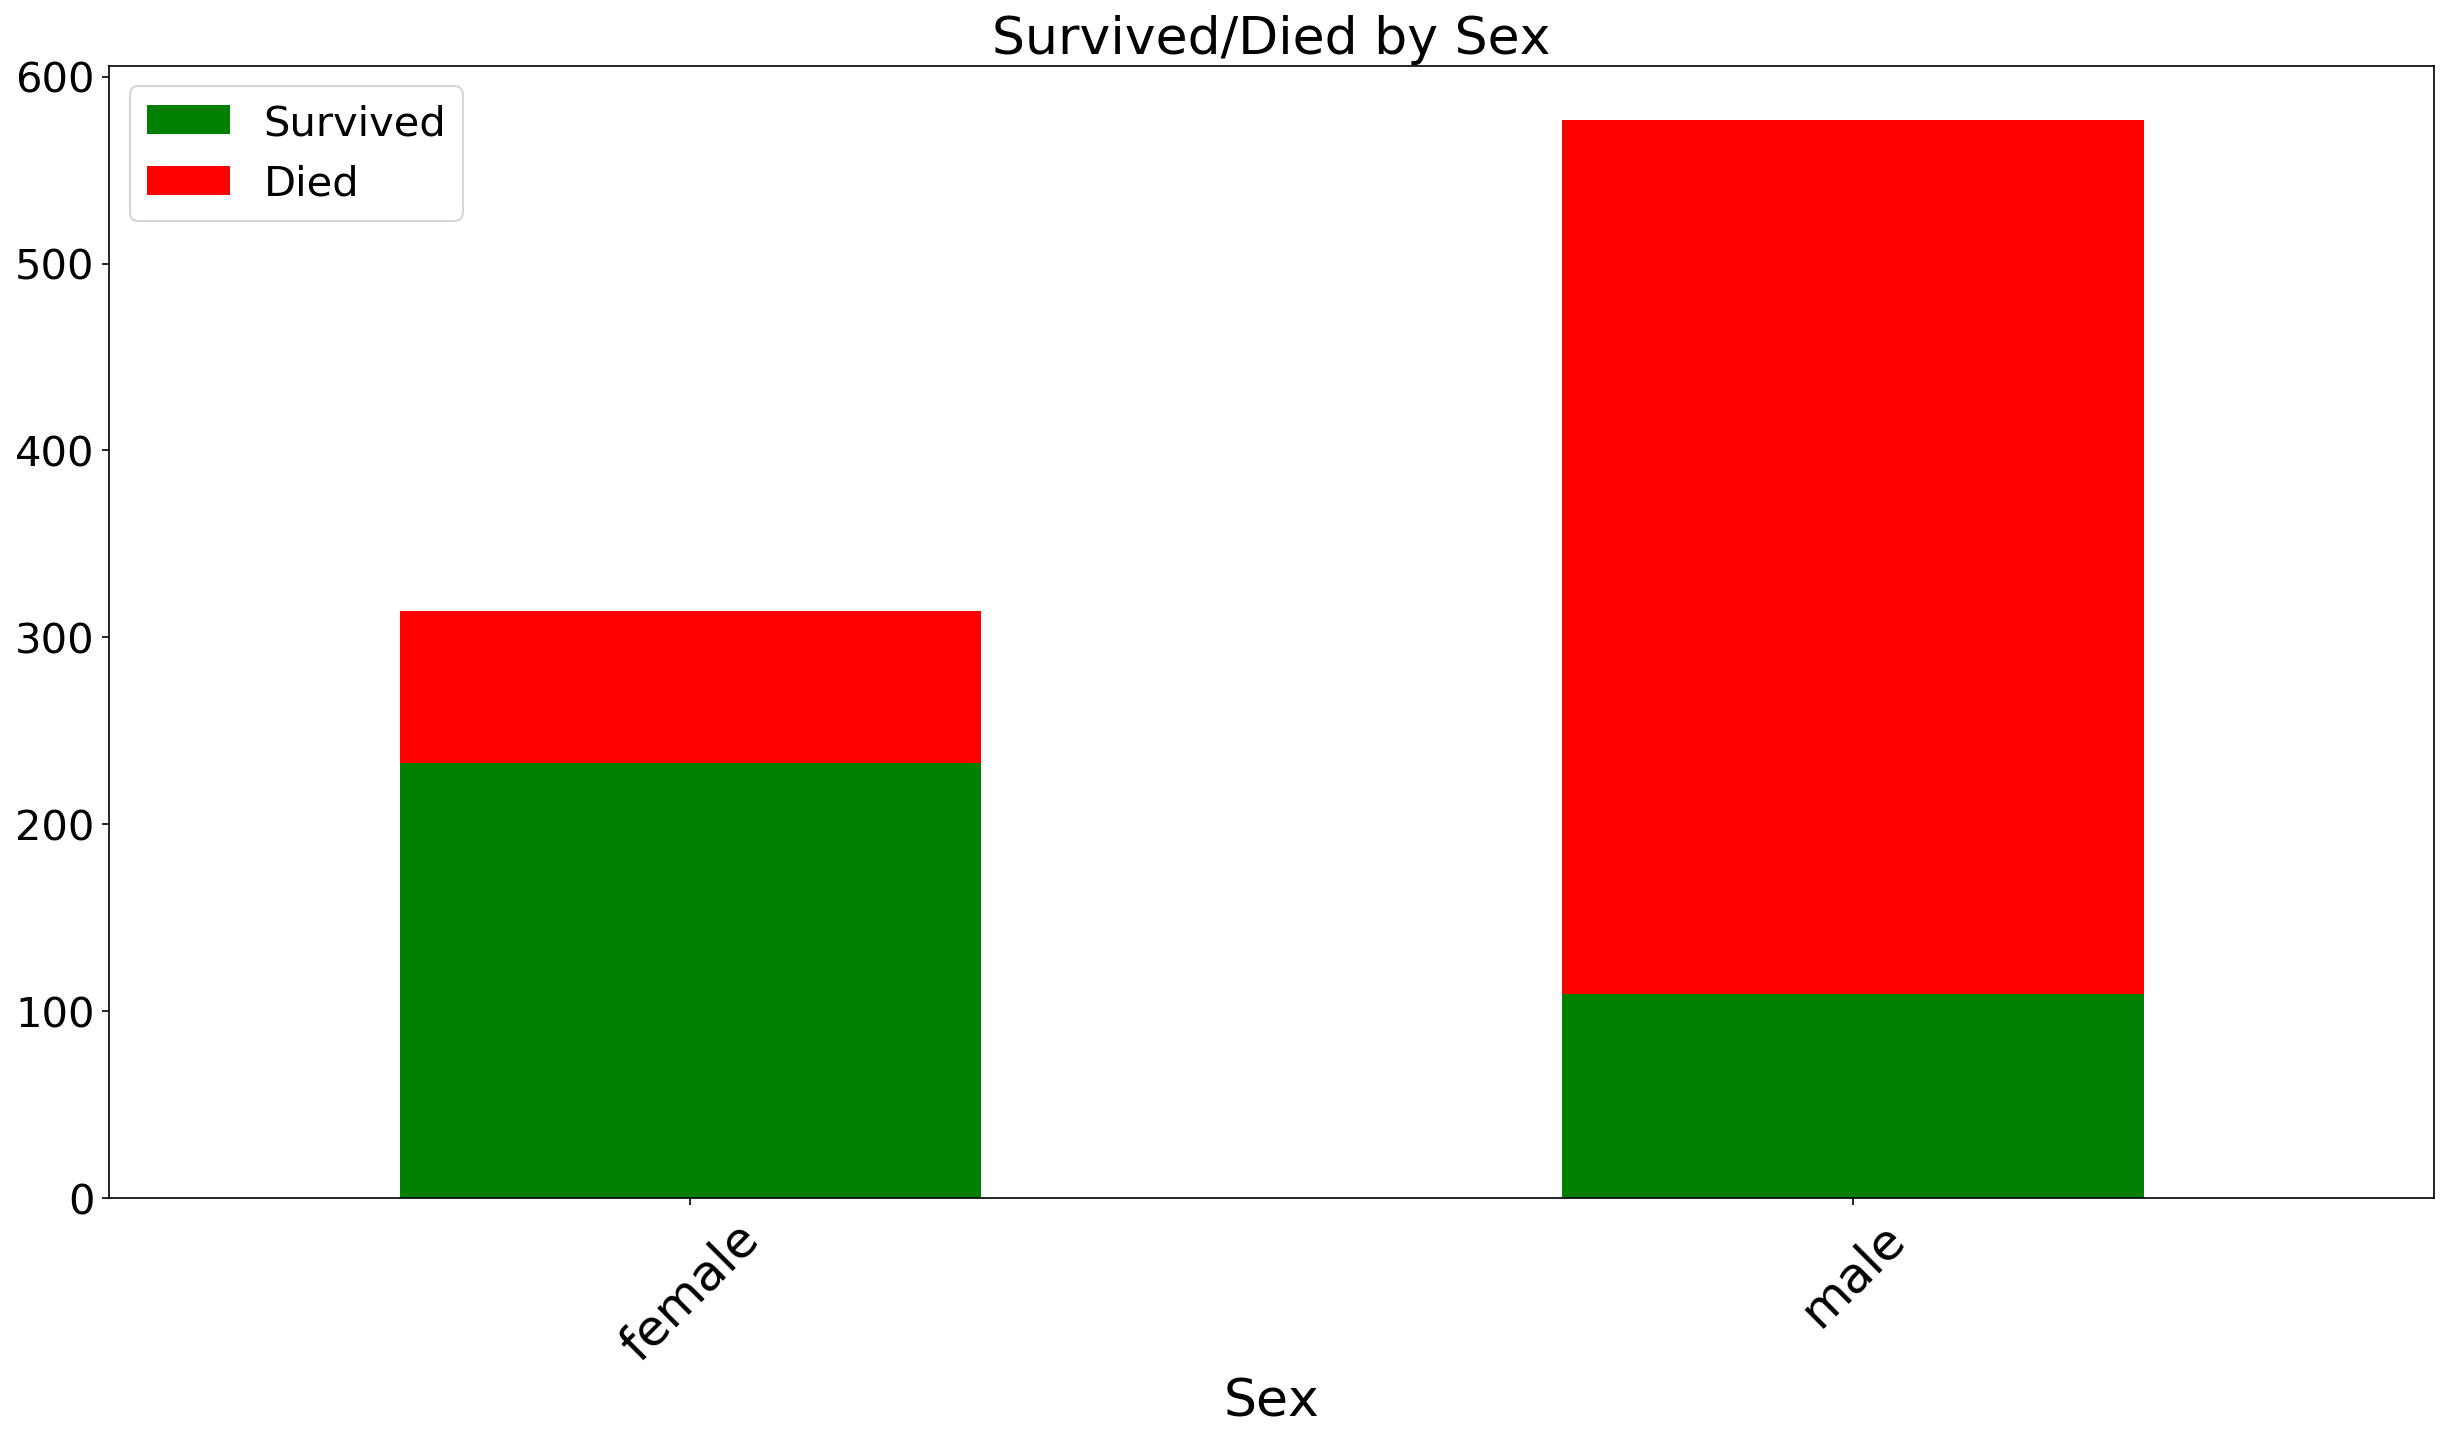

In [38]:
data['Died'] = 1 - data['Survived']
ax = data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(20, 10), stacked=True, color=['g', 'r']);
ax.tick_params(axis="x", labelsize=20)
ax.set_xlabel('Sex', fontsize=25)
ax.set_title('Survived/Died by Sex', fontsize=25)
ax.tick_params(axis="y", labelsize=20)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, fontsize=24);